![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [ ]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

: 

# Task 2: The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#the above method is standard method to load mnist data set
#mnist uses numpy to store the data.

### Shapes of Imported Arrays

In [3]:
#shape of imported arrays
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

# y_train is a (60000 * 1) vector


# import numpy as np
# arr = np.array([1,2,3])
# print(arr.shape)
# the output of the above program will be (3,)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Plot an Image Example

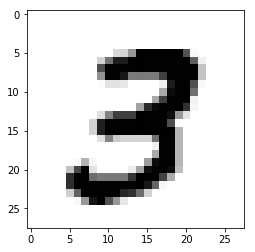

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
# 600000 examples are given in mnist library.
# Each image is 28 * 28 pixels.
plt.imshow(x_train[7], cmap='binary')   #cmap binary means black and white color.
#x_train[7] means 7th example in training set !
plt.show()

### Display Labels

In [5]:
y_train[7]

3

In [15]:
print(set(y_train))
#Since in our training data each image has only one digit, we get 10 different digits.

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [6]:
# In this task we will learn to manipulate the data.
# If x is present the we will set xth index and other indices will remain un-set.
from tensorflow.keras.utils import to_categorical
# Converts a class vector (integers) to binary class matrix; though in our case it will be a linear matrix.

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [16]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)
# we have converted a recoginition problem into classification problem, as for every class we have a switch.
# had we directly printed the digit instead of using bits, it would had been a regression problem instead of classification problem.

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


### Display Encoded Labels

In [17]:
y_train_encoded[7]
# a 10 dimensional vector where 3rd bit is set to 1 and everything else is set to 0;
# in our case when i=7, image of 3 is present, therefor 4th bit is set !

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [9]:
#if we have been given large number of data of X and their corresponding y, can we write a algorithm to find optimal value of w1, w2, w3 ....and b.
#we will use algebra to find the value of W and b sice X and Y is already given
#Thus we will find the values of W and b which best fits the given equations.

#currently shape of our input is 28*28, and we have to change it to 784*1 vector.
import numpy as np
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

print('x_train_reshaped_shape: ', x_train_reshaped.shape)
print('x_test_reshaped_shape: ', x_test_reshaped.shape)

x_train_reshaped_shape:  (60000, 784)
x_test_reshaped_shape:  (10000, 784)


### Display Pixel Values

In [18]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [19]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)#for standard deviation
epsilon=1e-10
#if x_std is almost zero, then we don't want our answer to be infinite kind of form, that's why we are using another small value to it.
#Since epsilon is very small it won't make a huge difference to the calculation !
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped-x_mean)/(x_std + epsilon)

### Display Normalized Pixel Values

In [20]:
print(set(x_train_norm[0]))

#much smaller values compared to previous one !
#Now scaling is done and all values are brought to smaller values.

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model
### Creating the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    #ReLU := Rectified Linear Units.
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    
    
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [25]:
model.compile(
    optimizer='sgd',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
#it displays the architecture of the data
#Ex: 128 * 10 + 10 biases
#for training our model we will only use training set, we will reserve the test set for testing purpose.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [29]:
# we will use normalize training set.
model.fit(x_train_norm,y_train_encoded, epochs=3)
# Accuracy will increase slowly

Epoch 1/3
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1151 - acc: 0.9660
Epoch 2/3
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0963 - acc: 0.9722
Epoch 3/3
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0825 - acc: 0.9766


### Evaluating the Model

In [30]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy: ', accuracy*100)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.1013 - acc: 0.9699
Test set accuracy:  96.99000120162964


# Task 8: Predictions

### Predictions on Test Set

In [32]:
preds = model.predict(x_test_norm)
print('Shape of predictions: ',preds.shape)

Shape of predictions:  (10000, 10)


### Plotting the Results

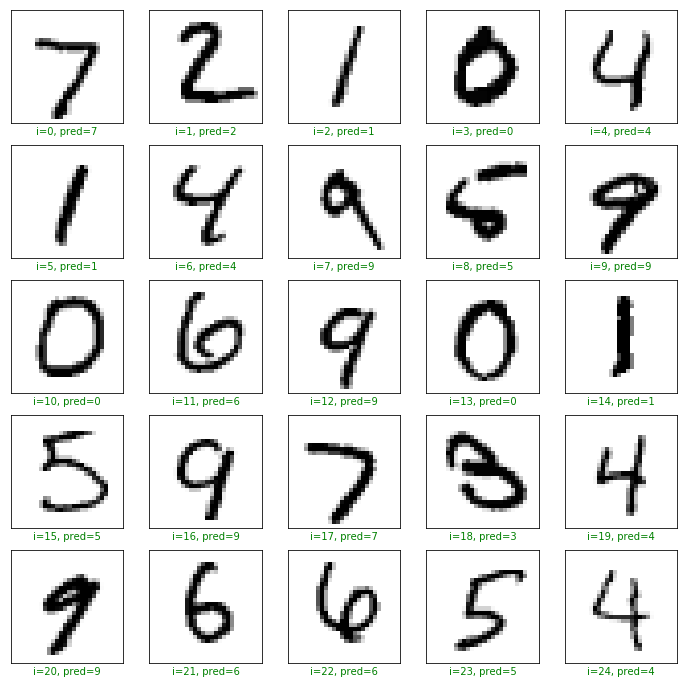

In [35]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    col = 'g'
    if pred !=gt:
        col='r'
        
        
    plt.xlabel('i={}, pred={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()

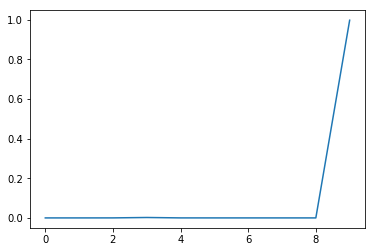

In [37]:
plt.plot(preds[7])
plt.show()
#probability of arr[7] equal to 9.